## Web Scraping Group Project: Languages by number of native speakers (Wikipedia 2022)

### Languages with at least 50 million first-language speakers

### Author: <font color='purple'> Jade Oakes </font>

### Get table data from Wikipedia

In [2]:
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd
url = "https://en.wikipedia.org/wiki/List_of_languages_by_number_of_native_speakers"

# Get the data from the URL and parse it
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

# Get the first table
tables = soup.findAll('table')[0]

### Create dataframe from table data

In [33]:
# Create lists for each column in the dataframe
A, B, C, D, E = [], [], [], [], []

# Add the data from the Wikipedia table to the dataframe
for row in tables.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) == 4:
        A.append(cols[0].find(text=True).strip())
        B.append(float(cols[1].find(text=True).strip()))
        C.append(cols[2].find(text=True).strip())
        D.append(cols[3].find(text=True).strip())

# Add column names to the dataframe
df = pd.DataFrame(A, columns=['Language'])
df['Native Speakers (millions)'] = B
df['Language Family'] = C
df['Branch'] = D
df

,Language,Native Speakers (millions),Language Family,Branch
0,Mandarin Chinese,920.0,Sino-Tibetan,Sinitic
1,Spanish,475.0,Indo-European,Romance
2,English,373.0,Indo-European,Germanic
3,Hindi,344.0,Indo-European,Indo-Aryan
4,Bengali,234.0,Indo-European,Indo-Aryan
5,Portuguese,232.0,Indo-European,Romance
6,Russian,154.0,Indo-European,Balto-Slavic
7,Japanese,125.0,Japonic,Japanese
8,Yue Chinese,85.2,Sino-Tibetan,Sinitic
9,Vietnamese,84.6,Austroasiatic,Vietic


### Save data to CSV

In [34]:
# Save data to CSV
df.to_csv('CSC221-webscrape-data.csv')

<function matplotlib.pyplot.show(close=None, block=None)>

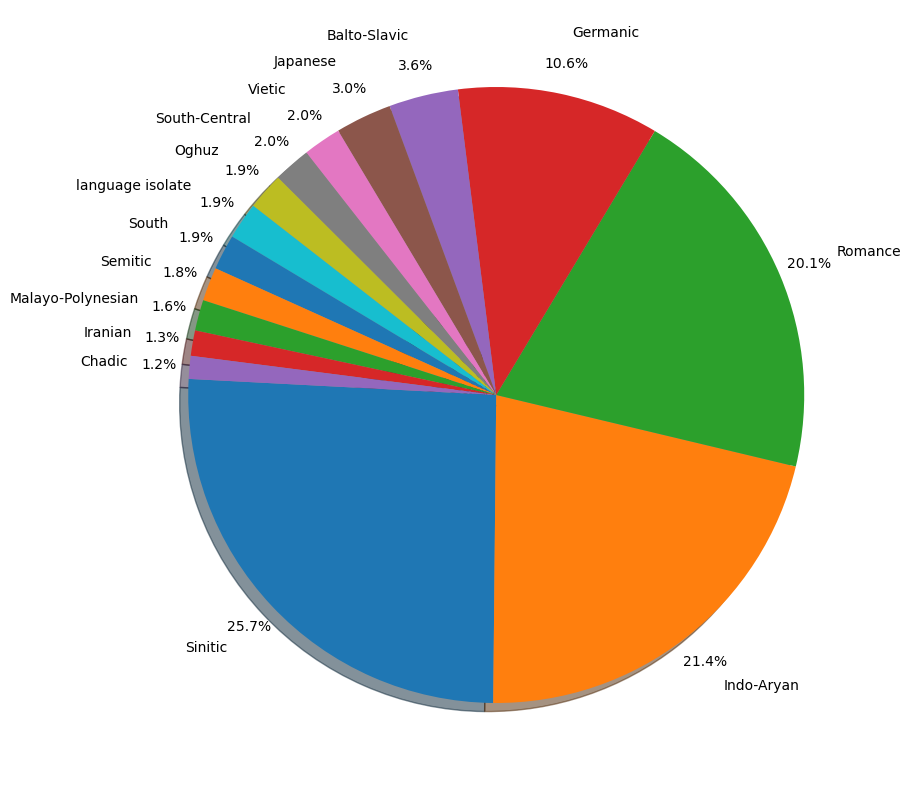

In [100]:
from matplotlib import pyplot as plt

lang_famls = df.groupby("Branch")[
    "Native Speakers (millions)"].agg("sum")

lang_famls = lang_famls.sort_values(ascending=False)

plt.figure(figsize=(10, 10))
plt.pie(lang_famls.values, labels=lang_famls.index, autopct='%1.1f%%',
        pctdistance=1.1, labeldistance=1.2, startangle=177, shadow=True)


plt.show
